In [9]:
import echelle

import matplotlib.pyplot as plt
import numpy as np
from lightkurve import search_lightcurvefile
from astropy.stats import LombScargle

We'll use one of the nice new stars from TESS, Beta Pic

In [3]:
lc_collection = search_lightcurvefile('Beta Pic', mission='TESS').download_all()
lc = lc_collection[0].PDCSAP_FLUX.normalize()
for l in lc_collection[1:]:
    lc = lc.append(l.PDCSAP_FLUX.normalize())

Now, we need the amplitude spectrum to get the echelle diagram

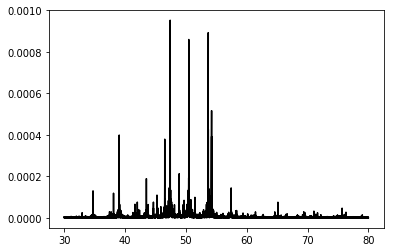

In [10]:
def amp_spectrum(t, y, fmin=None, fmax=None, nyq_mult=1., oversample_factor=5.):
    tmax = t.max()
    tmin = t.min()
    df = 1.0 / (tmax - tmin)
    
    if fmin is None:
        fmin = df
    if fmax is None:
        fmax = (0.5 / np.median(np.diff(t)))*nyq_mult

    freq = np.arange(fmin, fmax, df / oversample_factor)
    model = LombScargle(t, y)
    sc = model.power(freq, method="fast", normalization="psd")

    fct = np.sqrt(4./len(t))
    amp = np.sqrt(sc) * fct
    
    return freq, amp

lc = lc.remove_nans()
freq, amp = amp_spectrum(lc.time,lc.flux, fmin=30,fmax=80)
plt.plot(freq,amp,"k")

The large separation looks to be around 5 cpd

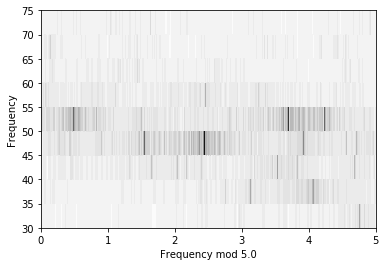

In [11]:
echelle.plot_echelle(freq,amp,5.)

We can also use an interactive Bokeh interface for changing the large separation on the go. This is pretty resource intensive for the time being, so best not to use it on old computers.

In [12]:
echelle.interact_echelle(freq,amp,5)